# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [84]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Extremely rude ground service....
1,✅ Trip Verified | My son and I flew to Geneva...
2,✅ Trip Verified | For the price paid (bought ...
3,✅ Trip Verified | Flight left on time and arr...
4,✅ Trip Verified | Very Poor Business class pr...


In [32]:
df.to_csv("./BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [85]:
# Extracting the label and creating a new 'label' column
df['label'] = df['reviews'].str.extract(r'(Not Verified|\✅ Trip Verified)')

# Removing the label and the "|" character from the original 'text' column
df['reviews'] = df['reviews'].str.replace(r'(Not Verified|\✅ Trip Verified)\s*\|\s*', '', regex=True)

In [86]:
df.head()

,reviews,label
0,Extremely rude ground service. We were non-rev...,Not Verified
1,My son and I flew to Geneva last Sunday for a ...,✅ Trip Verified
2,For the price paid (bought during a sale) it w...,✅ Trip Verified
3,Flight left on time and arrived over half an h...,✅ Trip Verified
4,"Very Poor Business class product, BA is not ev...",✅ Trip Verified


**Step 1: Cleaning text**

This part includes lowering the text size, removing number and special character, removing whitespaces, and deleting stopwords

In [94]:
def cleansing(df):
    df_clean = df.lower()
    df_clean = re.sub(r"\d+", "", str(df_clean))
    df_clean = re.sub(r'[^\w]', ' ', str(df_clean))
    df_clean = re.sub(r'\s+', ' ', str(df_clean))

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_words = []
    for sentence in df_clean:
        filtered_sentence = [word for word in sentence if word not in stop_words]
        filtered_words.append(filtered_sentence)

    return df_clean

df['clean review'] = df['reviews'].apply(cleansing)
df.head()

,reviews,label,clean review
0,Extremely rude ground service. We were non-rev...,Not Verified,extremely rude ground service we were non rev ...
1,My son and I flew to Geneva last Sunday for a ...,✅ Trip Verified,my son and i flew to geneva last sunday for a ...
2,For the price paid (bought during a sale) it w...,✅ Trip Verified,for the price paid bought during a sale it was...
3,Flight left on time and arrived over half an h...,✅ Trip Verified,flight left on time and arrived over half an h...
4,"Very Poor Business class product, BA is not ev...",✅ Trip Verified,very poor business class product ba is not eve...


**Step 2: Tokenization**

Tokenization is the process of breaking down text into smaller pieces (words) called tokens

**Step 3: Enrichment - POS Tagging**

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential to Lemmatization

**Step 4: Obtaining the stem words**

A stem is a part of a word responsible for its lexical meaning. The two popular techniques are Stemming and Lemmatization

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words

# POS tagging

In [95]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to C:\Users\Ferry
[nltk_data]     Irwanto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ferry
[nltk_data]     Irwanto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ferry
[nltk_data]     Irwanto\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [99]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['clean review'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to C:\Users\Ferry
[nltk_data]     Irwanto\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ferry Irwanto\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,label,clean review,POS tagged
0,Extremely rude ground service. We were non-rev...,Not Verified,extremely rude ground service we were non rev ...,"[(extremely, r), (rude, a), (ground, n), (serv..."
1,My son and I flew to Geneva last Sunday for a ...,✅ Trip Verified,my son and i flew to geneva last sunday for a ...,"[(son, n), (flew, v), (geneva, v), (last, a), ..."
2,For the price paid (bought during a sale) it w...,✅ Trip Verified,for the price paid bought during a sale it was...,"[(price, n), (paid, v), (bought, n), (sale, n)..."
3,Flight left on time and arrived over half an h...,✅ Trip Verified,flight left on time and arrived over half an h...,"[(flight, n), (left, v), (time, n), (arrived, ..."
4,"Very Poor Business class product, BA is not ev...",✅ Trip Verified,very poor business class product ba is not eve...,"[(poor, a), (business, n), (class, n), (produc..."


In [100]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,label,clean review,POS tagged,Lemma
0,Extremely rude ground service. We were non-rev...,Not Verified,extremely rude ground service we were non rev ...,"[(extremely, r), (rude, a), (ground, n), (serv...",extremely rude ground service non rev fly lo...
1,My son and I flew to Geneva last Sunday for a ...,✅ Trip Verified,my son and i flew to geneva last sunday for a ...,"[(son, n), (flew, v), (geneva, v), (last, a), ...",son fly geneva last sunday skiing holiday le...
2,For the price paid (bought during a sale) it w...,✅ Trip Verified,for the price paid bought during a sale it was...,"[(price, n), (paid, v), (bought, n), (sale, n)...",price pay bought sale decent experience alth...
3,Flight left on time and arrived over half an h...,✅ Trip Verified,flight left on time and arrived over half an h...,"[(flight, n), (left, v), (time, n), (arrived, ...",flight leave time arrive half hour earlier s...
4,"Very Poor Business class product, BA is not ev...",✅ Trip Verified,very poor business class product ba is not eve...,"[(poor, a), (business, n), (class, n), (produc...",poor business class product ba even close ai...


In [101]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Initialize the SentimentIntensityAnalyzer
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()


,reviews,label,clean review,POS tagged,Lemma,Sentiment,Analysis
0,Extremely rude ground service. We were non-rev...,Not Verified,extremely rude ground service we were non rev ...,"[(extremely, r), (rude, a), (ground, n), (serv...",extremely rude ground service non rev fly lo...,0.6829,Positive
1,My son and I flew to Geneva last Sunday for a ...,✅ Trip Verified,my son and i flew to geneva last sunday for a ...,"[(son, n), (flew, v), (geneva, v), (last, a), ...",son fly geneva last sunday skiing holiday le...,-0.8506,Negative
2,For the price paid (bought during a sale) it w...,✅ Trip Verified,for the price paid bought during a sale it was...,"[(price, n), (paid, v), (bought, n), (sale, n)...",price pay bought sale decent experience alth...,0.9100,Positive
3,Flight left on time and arrived over half an h...,✅ Trip Verified,flight left on time and arrived over half an h...,"[(flight, n), (left, v), (time, n), (arrived, ...",flight leave time arrive half hour earlier s...,-0.7906,Negative
4,"Very Poor Business class product, BA is not ev...",✅ Trip Verified,very poor business class product ba is not eve...,"[(poor, a), (business, n), (class, n), (produc...",poor business class product ba even close ai...,-0.2263,Negative


In [103]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    476
Negative    409
Neutral     115
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1d7d6b4fa10>,
 [Text(0.08285944828829286, 1.096874793141569, 'Positive'),
  Text(-0.46522795898930874, -0.9967762768919826, 'Negative'),
  Text(1.2628495055096343, -0.47719087002380156, 'Neutral')],
 [Text(0.045196062702705195, 0.598295341713583, '47.6%'),
  Text(-0.2537607049032593, -0.5436961510319904, '40.9%'),
  Text(0.7951274664319918, -0.30045351075572685, '11.5%')])

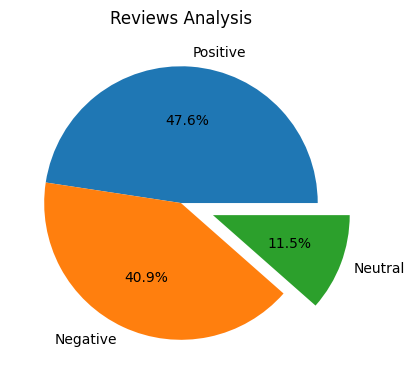

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [105]:
df.to_csv("BA_reviews_complete.csv")

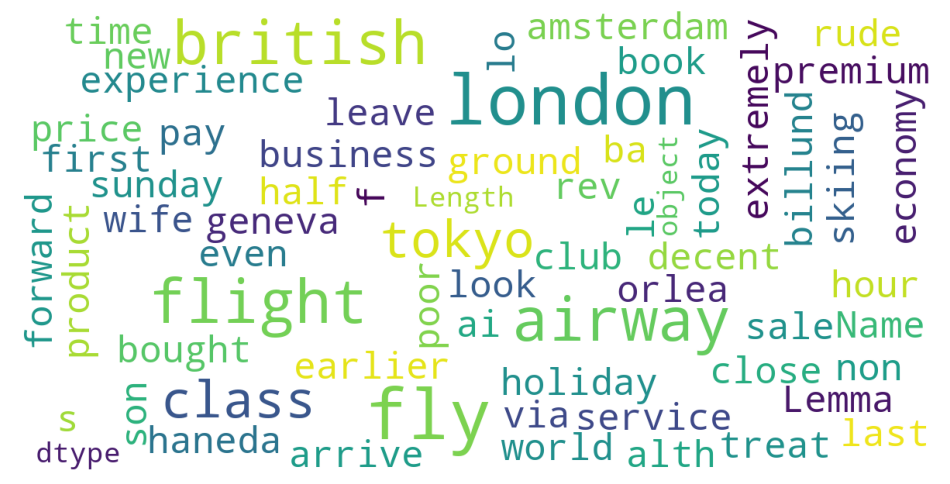

In [109]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)